In [90]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt

In [91]:
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2, 8, bias=False)
        self.M2 = nn.Linear(8, 1, bias=False)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.M1(x))
        x = self.M2(x)
        return x.squeeze()

In [92]:
def train_model(x, y, f, n_epochs=50):
    opt = SGD(f.parameters(), lr=0.001)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in range(n_epochs):
        opt.zero_grad()
        loss_value = L(f(x), y)
        loss_value.backward()
        opt.step()
        losses.append(loss_value.item())
    return f, losses

In [93]:
x = torch.tensor([[6, 2], [5, 2], [1, 3], [7, 6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

f2 = MyNeuralNet2()
f2, losses2 = train_model(x, y, f2, n_epochs=1000)

tensor([1., 5., 2., 5.]) tensor([2.8102, 2.5183, 2.0074, 5.2201], grad_fn=<SqueezeBackward0>)


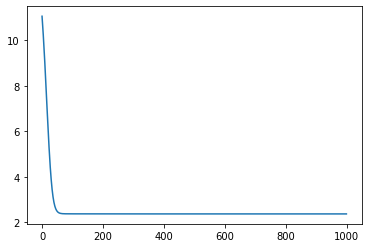

In [94]:
plt.plot(losses2)
print(y, f2(x))

In [95]:
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2, 80)
        self.M2 = nn.Linear(80, 1)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.M1(x))
        x = self.M2(x)
        return x.squeeze()

In [96]:
f3 = MyNeuralNet3()
f3, losses3 = train_model(x, y, f3, n_epochs=5000)

tensor([1., 5., 2., 5.]) tensor([1.3311, 4.5605, 2.0004, 5.0333], grad_fn=<SqueezeBackward0>)


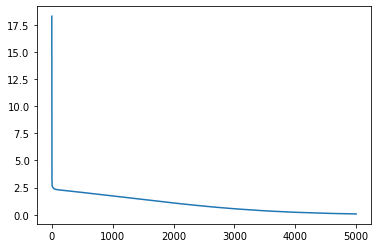

In [97]:
plt.plot(losses3)
print(y, f3(x))

In [98]:
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2, 80)
        self.M2 = nn.Linear(80, 80)
        self.M3 = nn.Linear(80, 1)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.M1(x))
        x = self.R(self.M2(x))
        x = self.M3(x)
        return x.squeeze()

In [99]:
f4 = MyNeuralNet4()
f4, losses4 = train_model(x, y, f4, n_epochs=5000)

tensor([1., 5., 2., 5.]) tensor([1.0012, 4.9964, 1.9998, 4.9994], grad_fn=<SqueezeBackward0>)


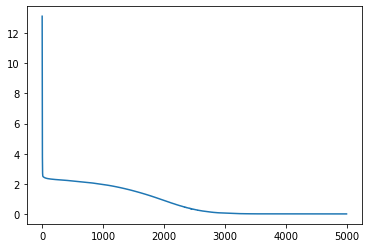

In [100]:
plt.plot(losses4)
print(y, f4(x))